# 数据处理
- 原始信号按照样本熵进行分块，并且提取每个片段的统计量特征向量为输入对象；
- 标签使用的是独热编码；

In [1]:
import os  
import pandas as pd  
import matplotlib.pyplot as plt
  
    #step1:加载数据集
# 设置数据集的路径  
data_dir = '/kaggle/input/110spm/110SPM/vibration'   
# 创建空的列表来存储所有的DataFrame  
X_data0 = []  
y_data0 = []
# 遍历指定目录下的所有文件  
for filename in os.listdir(data_dir):  
    if filename.endswith('.csv'):  
        # 构建文件的完整路径  
        file_path = os.path.join(data_dir, filename)  
        # 读取Excel文件  
        df = pd.read_csv(file_path)
        serie=df.iloc[:, 0]
        version_without_extension = filename.rsplit(".", 1)[0] 
        serie.name=version_without_extension
        # 将读取的DataFrame添加到列表中  
        X_data0.append(serie)
        y_data0.append(version_without_extension)

    #step2:遍历X_data0中的每个DataFrame，并删除非数字数据  
cleaned_data = []  
for df in X_data0:  
    df_cleaned = df[pd.to_numeric(df, errors='coerce').notnull()]  
    cleaned_data.append(df_cleaned)  
 

    #step3:将X_data0中的每个DataFrame的所有元素变为float类型 
for i, df in enumerate(cleaned_data):  
    X_data0[i] = df.astype(float) 

# 初始化X_data1来存储结果  
X_data1 = []  
  
# 遍历X_data0中的每个Series  
for series in X_data0:  
    # 计算步长（由于重叠率为50%，步长为序列长度的一半）  
    step_size = 256  # 因为512的一半是256，且我们想要50%的重叠  
    # 初始化一个空的list来存储子序列  
    subsequences = []  
    # 使用range和步长来生成子序列  
    for i in range(0, len(series) - 512 + 1, step_size):  
        # 确保切片是一维的，并转换为Series（虽然这里切片已经是Series）  
        subsequence = series.iloc[i:i+512]  
        subsequences.append(subsequence) 
    X_data1.append(subsequences)  
type(X_data1),len(X_data1),len(X_data1[0])

/tmp/ipykernel_19/1252109260.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_19/1252109260.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(list, 12, 6534)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 遍历 X_data0 中的每个 list 
means=[]
stds=[]
maxs=[]
mins=[]
medians=[]
skews=[]
kurts=[]
peak_factors=[]
clearance_factors=[]
kurtosiss=[]
impulse_factors=[]
y_data1=[]
for list0 in X_data1:
    for i in  range(len(list0)):
        data=list0[i]
        label=list0[i].name
        # 计算每列的离散特征，这将返回一个 Series，其中包含每列的离散特征
        mean = data.mean() 
        std = data.std()
        max0 = data.max()
        min0 = data.min()
        median = data.median()
        skew = data.skew()
        kurt = data.kurt()
        # 峰值指标（Peak Factor）  
        peak_value = np.max(data)  
        rms_value = np.sqrt(np.mean(data**2))  
        peak_factor = peak_value / rms_value  
  
        # 裕度指标（Clearance Factor）  
        # 这里我们定义为峰值与第二大绝对值的比值  
        second_largest_abs = np.sort(np.abs(data))[-2] if len(data) > 1 else 0  
        clearance_factor = peak_value / second_largest_abs  
  
        # 峭度指标（Kurtosis Factor）  
        # 注意：这里我们计算的是“样本峭度”，它通常与0进行比较（正态分布的峭度为0）  
        mean_value = np.mean(data)  
        std_dev = np.std(data)  
        kurtosis = np.sum((data - mean_value)**4) / (std_dev**4 * len(data)) - 3  
  
        # 脉冲指标（Impulse Factor）  
        mean_abs_value = np.mean(np.abs(data))  
        impulse_factor = peak_value / mean_abs_value 
        
        means.append(mean)
        stds.append(std)
        maxs.append(max0)
        mins.append(min0)
        medians.append(median)
        skews.append(skew)
        kurts.append(kurt)
        peak_factors.append(peak_factor)
        clearance_factors.append(clearance_factor)
        kurtosiss.append(kurtosis)
        impulse_factors.append(impulse_factor)
        y_data1.append(label)
all_lists = [means,stds,maxs,mins,medians,skews,kurts,peak_factors,clearance_factors,kurtosiss,impulse_factors]
X_data2 = pd.DataFrame(all_lists).T
y_data2=pd.Series(y_data1)
X_data2.shape,y_data2.shape

((63607, 11), (63607,))

In [3]:
# 假设X_train是一个列表，其中包含numpy数组  
X_data2_normalized_list = []  
  
for index, row in X_data2.iterrows(): 
    # 假设每个x都是一个numpy数组，形状为(11,)  
    x =np.array(row)
    min_val = x.min()  
    max_val = x.max()  
    x_normalized = (x - min_val) / (max_val - min_val)  
    X_data2_normalized_list.append(x_normalized)  
X_data2_normalized_array = np.array(X_data2_normalized_list)
X_data3=pd.DataFrame(X_data2_normalized_array)
print(f"row of type:{type(row)};row of len:{len(row)};")
X_data2_normalized_array.shape,X_data3.shape

row of type:<class 'pandas.core.series.Series'>;row of len:11;


((63607, 11), (63607, 11))

In [4]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from keras.utils import to_categorical
import time  
from keras.callbacks import Callback  

  
# 将数据转换为numpy数组  
data_array = np.array(X_data3)  
# 将标签转换为编码  

label_encoder = LabelEncoder()  
labels_encoded = label_encoder.fit_transform(y_data2)  
  
# 如果需要one-hot编码  
labels_one_hot = to_categorical(labels_encoded)  
  
# 这里你可能需要reshape data_array 以符合LSTM的输入要求  
# LSTM通常要求输入形状为 (samples, time_steps, features)  
# 假设每个series的长度相同，或者你可以填充/截断它们以具有相同的长度  
time_steps = data_array.shape[1]  # 假设所有series长度相同  
data_array = data_array.reshape(-1, time_steps, 1)  # 增加一个维度以匹配LSTM的输入要求

# 分割数据集  
X_train, X_temp, y_train, y_temp = train_test_split(data_array, labels_one_hot, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

2024-07-08 10:04:29.635844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 10:04:29.636028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 10:04:29.828835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 训练DNN模型
- 使用统计量特征训练DNN；
- 查看训练过程中的loss和val_loss的变化图；

In [5]:
import numpy as np  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Flatten  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical

model = Sequential([  
    # Flatten层对于一维输入不是必需的，但在这里展示如何添加  
    Flatten(input_shape=(11,)),  
    Dense(64, activation='relu'),  # 第一层隐藏层  
    Dropout(0.5),  # 防止过拟合  
    Dense(128, activation='relu'),  # 第二层隐藏层  
    Dropout(0.5),  
    Dense(12, activation='softmax')  # 输出层，12个类别，使用softmax激活  
])

model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy',  # 使用交叉熵损失，适合多分类问题  
              metrics=['accuracy'])
# 假设您已经准备好数据，并且它们已经按照上述形状组织  
# 接下来，训练模型  
history=model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)
model.save("/kaggle/working/DNN_model.h5")

Epoch 1/1000


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1114/1114 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1607 - loss: 2.2984 - val_accuracy: 0.3085 - val_loss: 1.9432
Epoch 2/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2857 - loss: 1.9878 - val_accuracy: 0.4033 - val_loss: 1.7057
Epoch 3/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3415 - loss: 1.8275 - val_accuracy: 0.4392 - val_loss: 1.5837
Epoch 4/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3635 - loss: 1.7344 - val_accuracy: 0.4480 - val_loss: 1.5280
Epoch 5/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3899 - loss: 1.6784 - val_accuracy: 0.4684 - val_loss: 1.4864
Epoch 6/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4046 - loss: 1.6374 - val_accuracy: 0.5047 - val_loss: 1.4344
Epoch 7/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4128 - loss: 1.6127 - val_accuracy: 0.5107 - val_loss: 1.3970
Epoch 8/1000
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4208 - loss: 1.5909

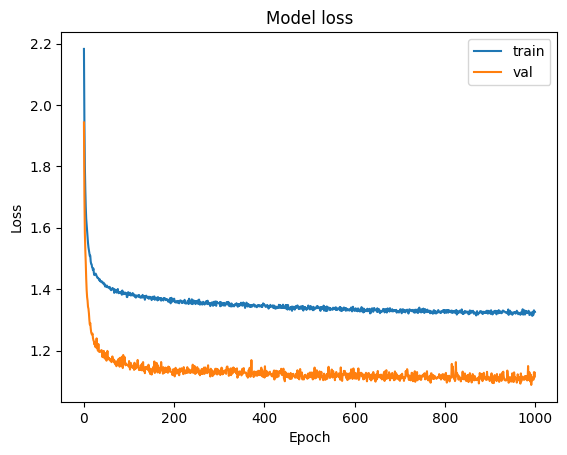

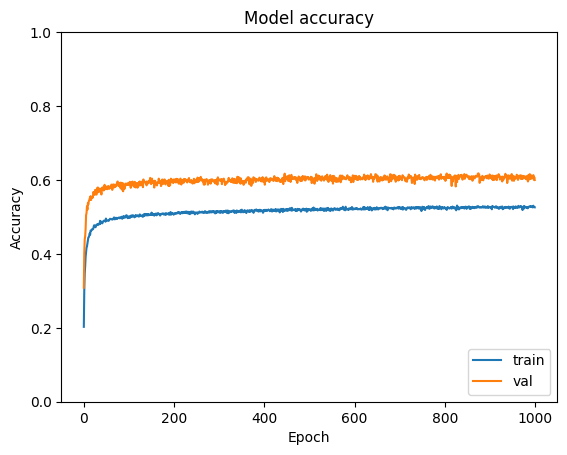

In [6]:
import matplotlib.pyplot as plt 
# 绘制训练loss和验证loss  
plt.plot(history.history['loss'], label='train')  
plt.plot(history.history['val_loss'], label='val')  
plt.legend(loc='upper right')  
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.show()  
  
# 绘制训练accuracy和验证accuracy  
plt.plot(history.history['accuracy'], label='train')  
plt.plot(history.history['val_accuracy'], label='val')  
plt.legend(loc='lower right')  
plt.title('Model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.ylim(ymin=0, ymax=1)  # 设置y轴的范围为0到1  
plt.show()

0.5921# 评估模型效果
- 使用测试集获得loss函数为1.1295，准确率为0.5921；(效果奇差无比)
- 混淆矩阵不堪入目；
- 很多类别的f1-score小于40%；
- future-DNN的模式效果不好不建议采用；


精确率衡量的是模型预测为正类的样本中，真正为正类的比例；召回率衡量的是所有正类样本中，被模型正确预测为正类的比例。F1分数则是这两个指标的调和平均，因此它同时考虑了模型的精确度和其对所有类别的覆盖率（或灵敏度）。'macro': 简单地对每个类别的F1分数进行未加权平均，赋予每个类别相同的权重，不考虑它们各自的样本数。'weighted': 对每个类别的F1分数进行加权平均，权重是每个类别的支持度（即每个类别的样本数）。这可以看作是对每个类别重要性的一种度量。

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


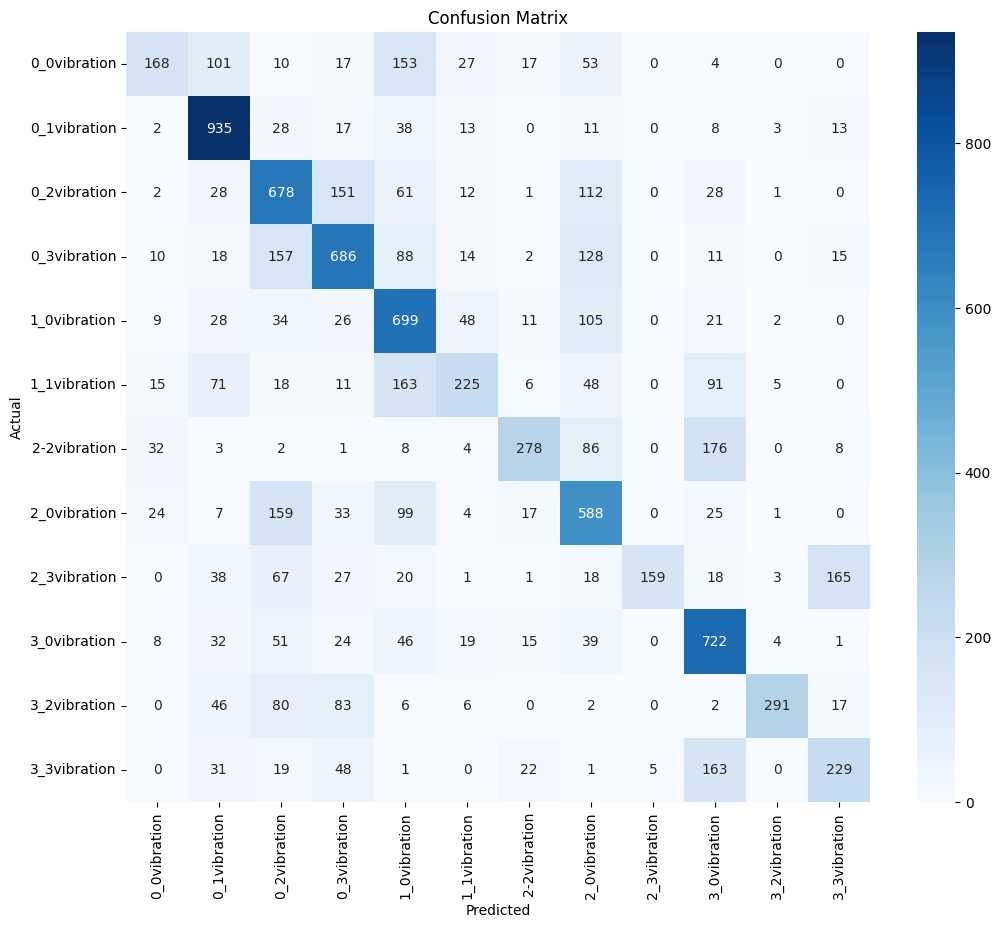

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5921 - loss: 1.1295
Test loss: 1.1261
Test accuracy: 0.5930


In [7]:
from tensorflow.keras.models import load_model  
from sklearn.metrics import confusion_matrix  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 加载模型  
model = load_model("/kaggle/input/110spmlstm/keras/110spmlstm/2/DNN_model.h5")  
  
# 假设X_test和y_test是你的测试数据和真实标签（整数索引）  
# 这里需要你已经有了这些变量  
  
# 预测测试集  
y_pred = model.predict(X_test)  
# 对于多分类问题，使用argmax获取预测类别索引  
y_pred_classes = np.argmax(y_pred, axis=1)  
   
# 计算混淆矩阵  
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)  # 确保y_test也是索引形式  
  
# 获取所有唯一标签的列表，这些标签将对应于整数编码的索引  
class_names = label_encoder.classes_  

# 绘制混淆矩阵  
plt.figure(figsize=(12, 10))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()

# 评估模型  
loss, accuracy = model.evaluate(X_test, y_test)  
print(f'Test loss: {loss:.4f}')  
print(f'Test accuracy: {accuracy:.4f}')

In [8]:
from sklearn.metrics import f1_score, classification_report  
import numpy as np  
  
# 假设 X_test 和 y_test 已经是准备好的测试集数据和标签  
  
# 使用模型进行预测  
y_pred_probs = model.predict(X_test)  # 获取预测的概率  
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # 将概率转换为类别标签  
  
# 注意：如果你的 y_test 是one-hot编码的，你需要先将其转换为类别索引  
y_true_classes = np.argmax(y_test, axis=1)  # 假设 y_test 是one-hot编码的  
  
# 计算F1分数  
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # 使用加权平均来计算多类别的F1分数  
print(f'F1 Score: {f1:.4f}')  
  
# 计算精确率、召回率和F1分数的详细报告  
report = classification_report(y_true_classes, y_pred_classes)  
print(report)

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.5835
              precision    recall  f1-score   support

           0       0.62      0.31      0.41       550
           1       0.70      0.88      0.78      1068
           2       0.52      0.63      0.57      1074
           3       0.61      0.61      0.61      1129
           4       0.51      0.71      0.59       983
           5       0.60      0.34      0.44       653
           6       0.75      0.46      0.57       598
           7       0.49      0.61      0.55       957
           8       0.97      0.31      0.47       517
           9       0.57      0.75      0.65       961
          10       0.94      0.55      0.69       533
          11       0.51      0.44      0.47       519

    accuracy                           0.59      9542
   macro avg       0.65      0.55      0.57      9542
weighted avg       0.62      0.59      0.58      9542

